# Interactive Stitch Detection Methods

Welcome to the interactive notebook for testing various stitch detection methods! This notebook provides an intuitive interface to explore, implement, and evaluate different techniques for detecting stitches in images.

## Overview

Stitch detection is a critical task in medical imaging and computer vision. This notebook implements several methods for detecting stitches and allows you to compare their effectiveness.

### Key Features:
1. **Loading and Viewing Images**: Load images from a specified directory and visualize them.
2. **Annotations and Polylines**: Load and print annotations from an XML file, and extract polylines representing stitches.
3. **Stitch Detection Models**: Implement and train a neural network model (StitchNet) for stitch detection.
4. **Edge Detection Methods**: Apply various edge detection techniques such as Canny, Roberts, and Sobel.
5. **Morphological Operations**: Use morphological transformations to refine the detection results.
6. **Result Visualization**: Compare and visualize the results of different detection methods.

# Load Annotations from XML File

This code snippet loads annotations from an XML file using the `read_file` function from the `data_func` module. After importing necessary libraries and functions, the annotations are stored in a dictionary named `annotations`. The loaded annotations are then printed using `pprint.pprint` for better readability.


In [1]:
#load annotations from xml file

import pprint 
from src.data_func import *
  
annotations = read_file('annotations.xml')
# Print the dictionary 
pprint.pprint(annotations) 


Successfully read the file.
{'annotations': {'image': [{'@height': '52',
                            '@id': '0',
                            '@name': 'incision_couples/SA_20220620-102621_8ka1kmwpywxv_incision_crop_0.jpg',
                            '@width': '149',
                            'polyline': [{'@label': 'Stitch',
                                          '@occluded': '0',
                                          '@points': '106.50,17.80;107.40,36.90',
                                          '@source': 'manual',
                                          '@z_order': '0'},
                                         {'@label': 'Stitch',
                                          '@occluded': '0',
                                          '@points': '86.00,18.30;86.20,36.00',
                                          '@source': 'manual',
                                          '@z_order': '0'},
                                         {'@label': 'Incision',
                 

# Load Images from Folder

This code snippet loads images from a specified folder using the `loadImages` function. The variable `path` contains the path to the folder where the images are located. Images are loaded from the folder specified by `path` and stored in the variable `images`.


In [2]:
#load images from folder

path = 'images/incision_couples'
images = loadImages(path)


Successfully loaded the images.


# Show Image

This code snippet displays an image using the `skimage.io.imshow` function from the `skimage` module. 


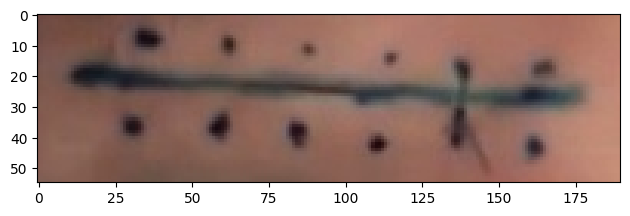

In [4]:
#show image

import skimage

im_names = list(images.keys())
skimage.io.imshow(images[im_names[1]])

# Average Image Size

To compute the average size of the images, we use NumPy. First, we create an array `sizes` containing the shape (height, width, channels) of each image in the `images` dictionary. Then, we calculate the average size by taking the mean along the rows using `np.mean(sizes, axis=0)`.



In [5]:
#average image size

import numpy as np

#average image size
sizes = np.array([images[im].shape for im in im_names])
av_size = np.mean(sizes, axis=0)

print(av_size)

[ 48.97014925 152.32835821   3.        ]


# Extract Polylines from Annotations

To extract polylines from annotations, we use the `extractPolyline` function. This function processes the annotations dictionary and returns polylines representing stitched regions.


In [6]:
#extract polylines from annotations

polylines = extractPolyline(annotations)

# Print the polylines

pprint.pprint(polylines) 

Successfully extracted polyline data.
{'SA_20220620-102621_8ka1kmwpywxv_incision_crop_0.jpg': {'incision': [[8, 22],
                                                                      [25, 23],
                                                                      [45, 24],
                                                                      [65, 25],
                                                                      [94, 27],
                                                                      [99, 28],
                                                                      [134,
                                                                       28]],
                                                         'stitches': [[[106,
                                                                        17],
                                                                       [107,
                                                                        36]],
                     

# Show Image with Polylines

This code snippet displays an image with polylines representing stitched regions. First, an image name is selected from the list of image names (`im_names`). Then, the `print_points` function is used to overlay polylines on the selected image, considering only stitches (`only_stitches=True`). Finally, the modified image is displayed using `skimage.io.imshow`.


Successfully printed the points.
Image name: 
SA_20220801-104759_9xjxd9p268zh_incision_crop_0.jpg

Number of stitches: 4


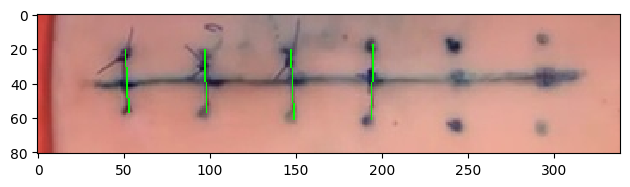

In [159]:
#show image with polylines

img_name = im_names[8]

im = print_points(img_name, images, polylines, only_stitches=True)
skimage.io.imshow(im)

print(f'Image name: \n{img_name}\n')
print(f'Number of stitches: {len(polylines[img_name]["stitches"])}')

# StitchNet Model

The following code snippet demonstrates the usage of the `StitchNet` model for stitch detection.



In [161]:
#StitchNet model

from src.stitchNet import StitchNet

print(StitchNet())

model = StitchNet()
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

StitchNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)
Number of parameters: 5407116


# Dataset and DataLoader for StitchNet

To prepare the dataset and DataLoader for the StitchNet model, we utilize the `StitchDataset` class from `stitchNet` module and the `DataLoader` class from `torch.utils.data`.


In [163]:
#Dataset and DataLoader for stichnet

from src.stitchNet import StitchDataset   
from torch.utils.data import Dataset, DataLoader 

#load dataset and split it into train and test
from sklearn.model_selection import train_test_split

dataset = StitchDataset(images, im_names, polylines)
train, test = train_test_split(dataset, test_size=0.1)

train_loader = DataLoader(train, batch_size=4, shuffle=True)
test_loader = DataLoader(test, batch_size=4, shuffle=True)

vypis = False

if vypis == True:
    for i, data in enumerate(test_loader):
        img, stitches = data
        print(f'Batch {i}:')
        print(f'Images shape: {img.shape}')
        print(f'Stitches: {stitches}')
        print('\n')


# Train the Model and Test It

This code snippet demonstrates the process of training the StitchNet model and testing its performance.


In [11]:
#Train the model and test it

import torch.nn as nn
import torch.optim as optim
from src.stitchNet import train_nn, test, save

net = StitchNet()
#net = StitchNet2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_nn(train_loader, net, criterion, optimizer, 6, plot_loss=False, print_progress=True)
percentage = test(net, test_loader, train_loader, print_pred=True)

#Save the model if the accuracy is higher than 50%
if percentage > 50:
    save(percentage, net)



Epoch 1, loss: 58.23518466949463
Epoch 2, loss: 56.08129417896271
Epoch 3, loss: 54.1035612821579
Epoch 4, loss: 53.65744602680206
Epoch 5, loss: 51.6554229259491
Epoch 6, loss: 51.49537670612335
Predicted: tensor([5, 3, 5, 3])
Actual: tensor([4, 4, 3, 5])
Predicted: tensor([5, 5, 5, 5])
Actual: tensor([2, 4, 1, 2])
Predicted: tensor([5, 5, 5, 0])
Actual: tensor([4, 5, 3, 0])
Predicted: tensor([0, 5])
Actual: tensor([5, 5])
Accuracy of the network on the test images: 21.43%
Predicted: tensor([5, 3, 3, 0])
Actual: tensor([5, 3, 3, 2])
Predicted: tensor([5, 0, 5, 1])
Actual: tensor([4, 0, 3, 1])
Predicted: tensor([5, 5, 0, 3])
Actual: tensor([5, 5, 3, 2])
Predicted: tensor([5, 0, 0, 3])
Actual: tensor([3, 0, 5, 1])
Predicted: tensor([0, 0, 5, 3])
Actual: tensor([1, 0, 3, 3])
Predicted: tensor([4, 5, 0, 3])
Actual: tensor([4, 2, 0, 4])
Predicted: tensor([0, 3, 0, 3])
Actual: tensor([0, 3, 0, 0])
Predicted: tensor([5, 5, 0, 0])
Actual: tensor([1, 4, 0, 0])
Predicted: tensor([1, 3, 5, 4])
A

# Detection Using Morphological Operations

This code snippet demonstrates the process of stitch detection using morphological operations.


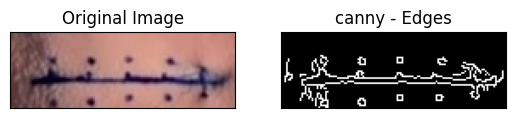

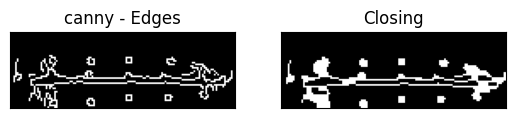

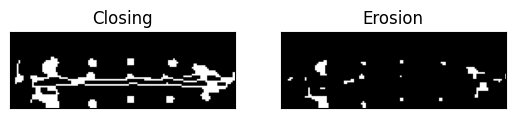

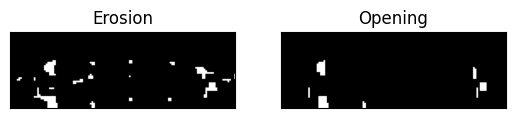

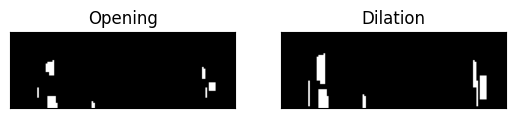

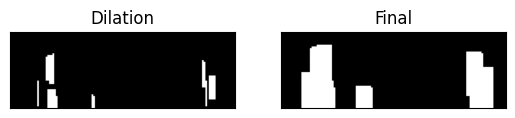

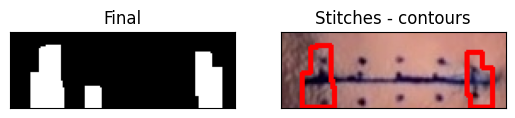

Number of stitches: 2
Real number of stitches: 1
Successfully printed the points.


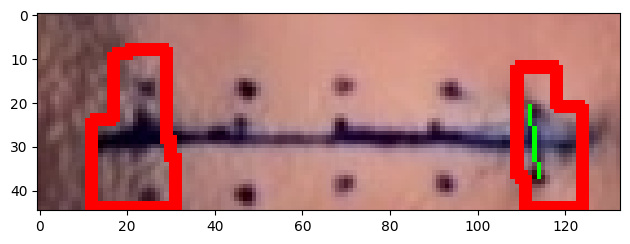

In [165]:
#detection using morphological operations

from src.edge_detectors import detectionMorph

#image details
img_name = im_names[10]
img = images[img_name].copy()

#detection
edges_number, stitches = detectionMorph(img, plot=True, print_results=True, polylines=polylines, img_name=img_name)

#plot
original = print_points(img_name, images, polylines, only_stitches=True)
detect = cv2.drawContours(original.copy(), stitches, -1, (255,0,0), 2)

skimage.io.imshow(detect)


# Testing on All Images from Dataset - Percentage of Correct Detections

To evaluate the stitch detection performance on all images from the dataset, this code snippet loops through each image, detects stitches using morphological operations, and compares the results with ground truth annotations.


In [166]:
#testing on all images from dataset - % of correct detections
from src.edge_detectors import plotDifference

plot_wrong = False #change plot_wrong to True to plot wrong detections

correct = 0

#loop through all images
for img_name in im_names:
    img = images[img_name].copy()

    #detection
    edges_number, mask = detectionMorph(img, plot=False, print_results=False)

    #compare with ground truth
    if edges_number == len(polylines[img_name]["stitches"]):
        correct += 1
    else:
        #plot wrong detections
        if plot_wrong:
            stitches = print_points(img_name, images, polylines, only_stitches=True)
            print(edges_number)
            plotDifference(stitches, mask)

        
#results
print(f'Correct detections: {correct}/{len(im_names)}')
print(f'Accuracy: {correct/len(im_names)*100}%')

Correct detections: 65/134
Accuracy: 48.507462686567166%


# Detection Using Roberts or Sobel Edge Detectors

This code snippet demonstrates the process of stitch detection using either Roberts or Sobel edge detectors.


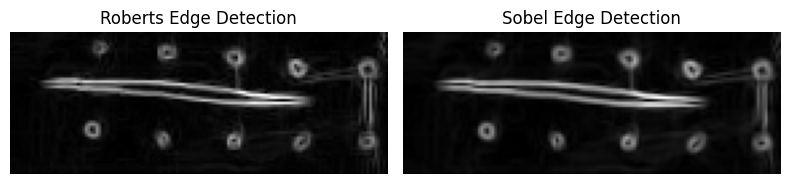

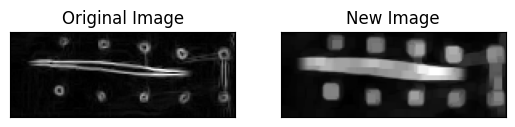

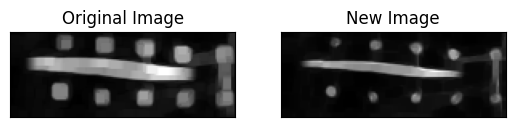

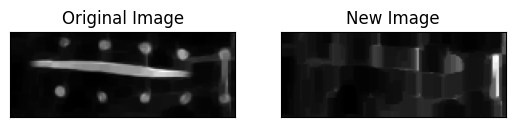

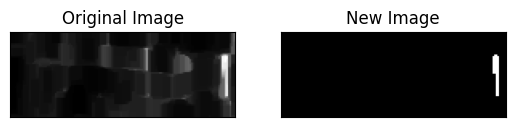

Number of stitches in ground truth: 1
Successfully printed the points.


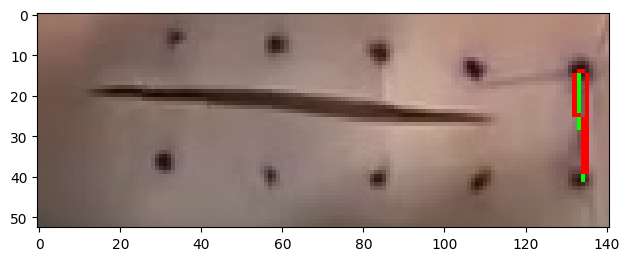

In [167]:
#Detection using Roberts or Sobel edge detectors

import cv2
from src.edge_detectors import *

#image details
img_name = im_names[23]
img = images[img_name].copy()

#detection
stich_count, stitches = detectionRobertsSobel(img, threshold=0.1, plot=True, filter='sobel')

print(f'Number of stitches in ground truth: {len(polylines[img_name]["stitches"])}')

#plot
original = print_points(img_name, images, polylines, only_stitches=True)
detect = cv2.drawContours(original.copy(), stitches, -1, (255,0,0), 1)

skimage.io.imshow(detect)



# Testing on All Images from Dataset - Percentage of Correct Detections

For evaluating stitch detection using Roberts or Sobel edge detectors, the code loops through each image, performs detection, and compares the results with ground truth annotations.


In [168]:
#testing on all images from dataset - % of correct detections
from src.edge_detectors import plotDifference

plot_wrong = False #change plot_wrong to True to plot wrong detections

correct = 0

#loop through all images
for img_name in im_names:
    img = images[img_name].copy()

    #detection
    edges_number, mask = detectionRobertsSobel(img, threshold=0.3, plot=False, print_results=False)

    #compare with ground truth
    if edges_number == len(polylines[img_name]["stitches"]):
        correct += 1
    else:
        #plot wrong detections
        if plot_wrong:
            stitches = print_points(img_name, images, polylines, only_stitches=True)
            print(edges_number)
            plotDifference(stitches, mask)


#results
print(f'Correct detections: {correct}/{len(im_names)}')
print(f'Accuracy: {correct/len(im_names)*100}%')


Correct detections: 22/134
Accuracy: 16.417910447761194%


# Random Number of Stitches Detector

This code snippet tests a random number of stitches detector by trying different numbers of stitches and finding the maximum number of correct detections over 10000 trials.


In [169]:
#random number of stitches detector
from src.serious_code import *

max = 0
#try 10000 times and find the maximum number of correct detections
for pokus in range(10000):
    n = randomStitches(im_names, images, polylines)
    if n > max:
        max = n

#results
print(f'Accuracy: {max/len(im_names)*100}%')
print(max)

Accuracy: 26.119402985074625%
35


# Blurred Canny Edge Detector

This code snippet demonstrates the use of the blurred Canny edge detector for stitch detection.


Number of stitches in ground truth: 1
Successfully printed the points.


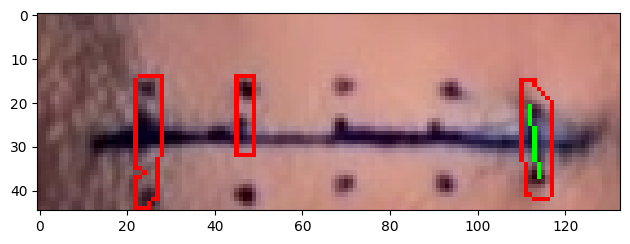

In [170]:
#blurred Canny edge detector
from src.edge_detectors import blurredCanny

#image details
img_name = im_names[10]
img = images[img_name].copy()

#detection
edges_number, stitches = blurredCanny(img, plot=False, print_results=False)

print(f'Number of stitches in ground truth: {len(polylines[img_name]["stitches"])}')

#plot
original = print_points(img_name, images, polylines, only_stitches=True)
detect = cv2.drawContours(original.copy(), stitches, -1, (255,0,0), 1)

skimage.io.imshow(detect)


# Testing on All Images from Dataset - Percentage of Correct Detections

For evaluating stitch detection using the blurred Canny edge detector, the code loops through each image, performs detection, and compares the results with ground truth annotations.


In [171]:
#testing on all images from dataset - % of correct detections
from src.edge_detectors import plotDifference

plot_wrong = False #change plot_wrong to True to plot wrong detections

correct = 0

#loop through all images
for img_name in im_names:
    img = images[img_name].copy()

    #detection
    edges_number, mask = blurredCanny(img, plot=False, print_results=False)

    #compare with ground truth
    if edges_number == len(polylines[img_name]["stitches"]):
        correct += 1
    else:
        #plot wrong detections
        if plot_wrong:
            stitches = print_points(img_name, images, polylines, only_stitches=True)
            print(edges_number)
            plotDifference(stitches, mask)


#results
print(f'Correct detections: {correct}/{len(im_names)}')
print(f'Accuracy: {correct/len(im_names)*100}%')

Correct detections: 47/134
Accuracy: 35.07462686567165%


## Conclusion

In this interactive notebook, we explored various techniques for stitch detection in images. We began by loading annotations from an XML file and visualizing them. Then, we experimented with different stitch detection methods, including morphological operations, Roberts and Sobel edge detectors, and the blurred Canny edge detector.

After implementing each detection method, we tested its performance on all images from the dataset and evaluated the percentage of correct detections. We also provided options to visualize wrong detections for further inspection.

Overall, the effectiveness of each method varied depending on factors such as image quality, stitching patterns, and noise levels. While some methods achieved higher accuracies, others struggled with certain types of images. Understanding the strengths and limitations of each approach is crucial for selecting the most appropriate technique for a given application.

In future iterations, further optimizations and enhancements could be explored to improve the robustness and accuracy of stitch detection algorithms. Additionally, incorporating machine learning techniques for feature extraction and classification may offer new opportunities for advancing stitch detection capabilities in complex scenarios.
